In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import kid_readout.roach.heterodyne
reload(kid_readout.roach.heterodyne)

<module 'kid_readout.roach.heterodyne' from '/home/gjones/readout/kid_readout/kid_readout/roach/heterodyne.pyc'>

In [3]:
import kid_readout.utils.sweeps

In [5]:
512e6/2**16

7812.5

In [11]:
78125/1e6

0.078125

In [12]:
1/_

12.8

In [15]:
1e6/128.

7812.5

In [16]:
np.arange(-64,64)/128.

array([-0.5      , -0.4921875, -0.484375 , -0.4765625, -0.46875  ,
       -0.4609375, -0.453125 , -0.4453125, -0.4375   , -0.4296875,
       -0.421875 , -0.4140625, -0.40625  , -0.3984375, -0.390625 ,
       -0.3828125, -0.375    , -0.3671875, -0.359375 , -0.3515625,
       -0.34375  , -0.3359375, -0.328125 , -0.3203125, -0.3125   ,
       -0.3046875, -0.296875 , -0.2890625, -0.28125  , -0.2734375,
       -0.265625 , -0.2578125, -0.25     , -0.2421875, -0.234375 ,
       -0.2265625, -0.21875  , -0.2109375, -0.203125 , -0.1953125,
       -0.1875   , -0.1796875, -0.171875 , -0.1640625, -0.15625  ,
       -0.1484375, -0.140625 , -0.1328125, -0.125    , -0.1171875,
       -0.109375 , -0.1015625, -0.09375  , -0.0859375, -0.078125 ,
       -0.0703125, -0.0625   , -0.0546875, -0.046875 , -0.0390625,
       -0.03125  , -0.0234375, -0.015625 , -0.0078125,  0.       ,
        0.0078125,  0.015625 ,  0.0234375,  0.03125  ,  0.0390625,
        0.046875 ,  0.0546875,  0.0625   ,  0.0703125,  0.0781

In [7]:
ri = kid_readout.roach.heterodyne.RoachHeterodyne()

In [9]:
ri.set_fft_gain(4)

In [10]:
ri.set_lo(940.)

In [18]:
frq = kid_readout.utils.sweeps.prepare_sweep(ri,np.arange(-128,128)+940,offsets=np.arange(-64,64)/128.,nsamp=2**17)

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0



In [19]:
swp = kid_readout.utils.sweeps.do_prepared_sweep(ri,loopback=False,nchan_per_step=32)

detected mcnt overflow None 950652 0 65536 0 608 950652
detected mcnt overflow None 754029 0 65536 0 528 754029
detected mcnt overflow None 426334 0 65536 0 496 426334
detected mcnt overflow None 753999 0 65536 0 464 753999
detected mcnt overflow None 229696 0 65536 0 64 229696
detected mcnt overflow None 622896 0 65536 0 896 622896
detected mcnt overflow None 295201 0 65536 0 656 295201
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
index 0 is out of bounds for axis 0 with size 0
detected mcnt overflow None 164115 0 65536 0 336 164115
detected mcnt overflow None 360820 0 65536 0 928 360820
detected mcnt ove

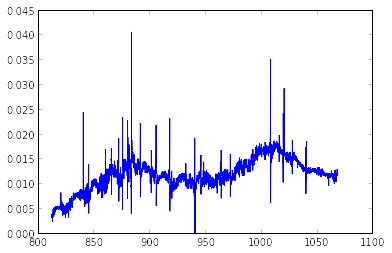

In [20]:
plot(swp.freqs,np.abs(swp.data))

In [21]:
d2 = swp.data

(-3, 0)

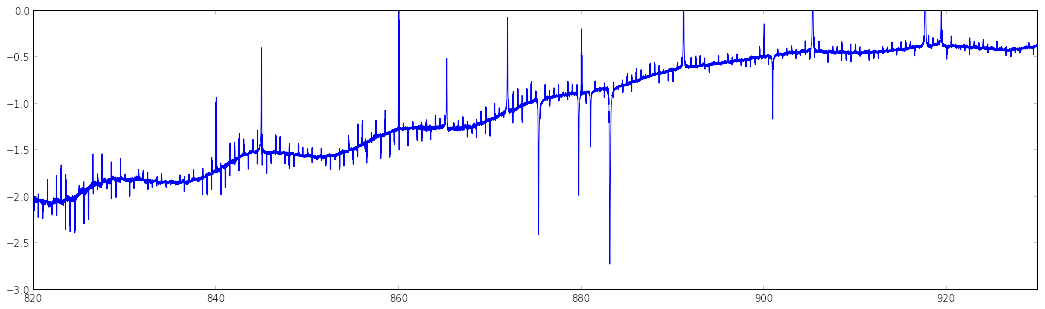

In [55]:
figure(figsize=(18,5))
d2 = swp.data
d2 = d2*np.exp(31.3j*2*np.pi*(swp.freqs-940))
plot(swp.freqs,np.angle(d2))
xlim(820,930)
ylim(-3,0)

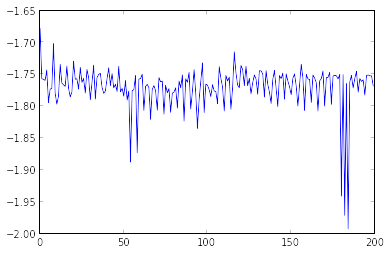

In [58]:
plot(np.angle(d2[:200]))

(-50, -30)

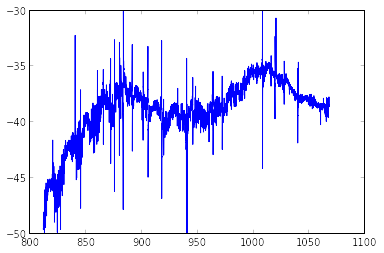

In [52]:
plot(swp.freqs,20*np.log10(abs(d2)))
ylim(-50,-30)

In [59]:
np.savez('/home/gjones/2015-06-19-initial-sweep.npz',freq=swp.freqs,lo=940,data=d2)

In [60]:
resonances = [844.95,
             865.24,
             871.9,
             875.29,
             879.67,
             880.99,
             883.09,
             891.17,
             900.9,
             905.3,
             917.6,
             919.4,
             945.5,
             947.5,
             950.4,
             963.58,
             971.77,
             992.03,
             1002.93,
             1007.93,
             1015.6,
             1019.13,
             1027.3,
             1034.36,
             1039.54,
             ]

In [61]:
len(resonances)

25

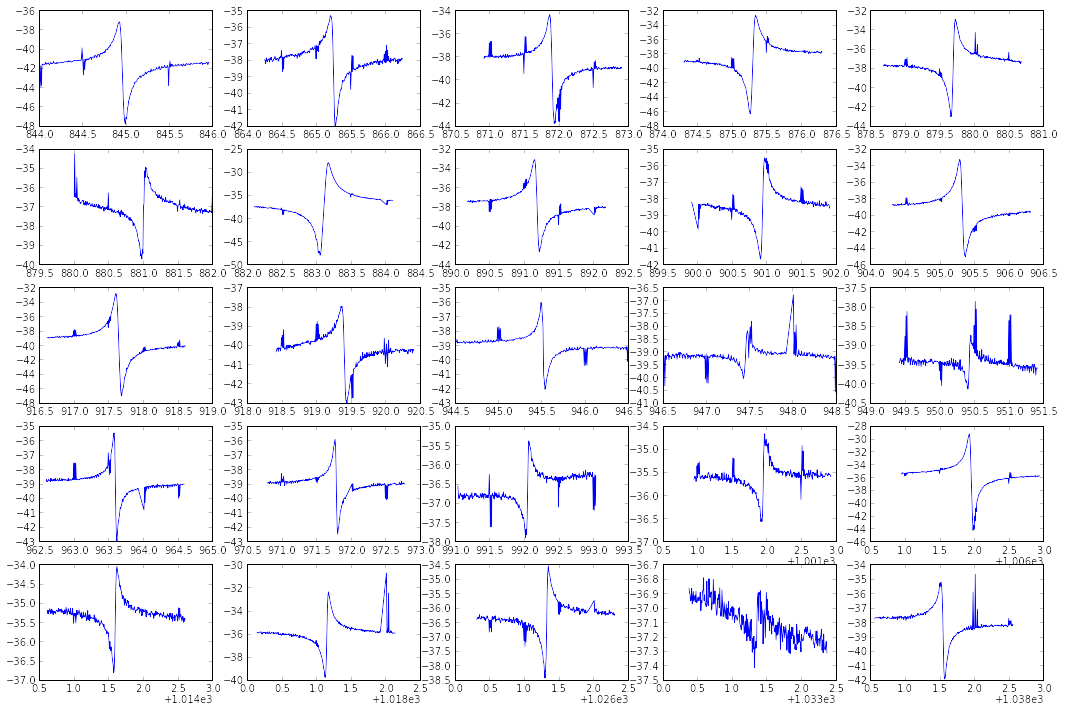

In [64]:
fig,axs = subplots(5,5,figsize=(18,12))
for k in range(25):
    ax = axs.flatten()[k]
    f0 = resonances[k]
    idx = abs(swp.freqs - f0) < 1
    ax.plot(swp.freqs[idx],20*np.log10(abs(d2[idx])))

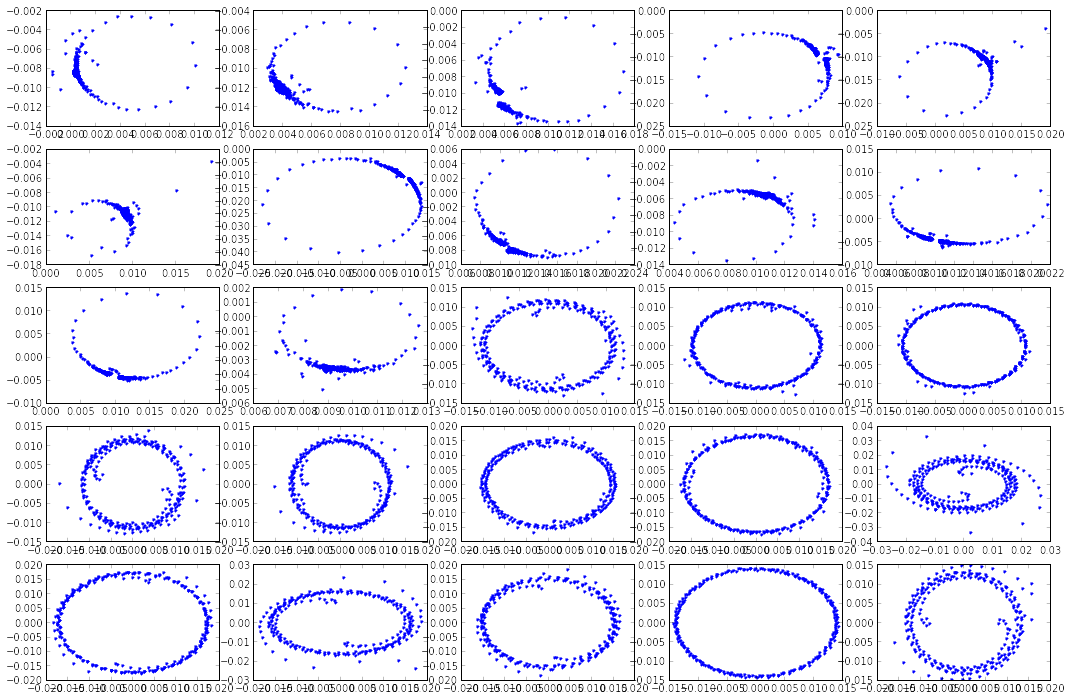

In [65]:
fig,axs = subplots(5,5,figsize=(18,12))
for k in range(25):
    ax = axs.flatten()[k]
    f0 = resonances[k]
    idx = abs(swp.freqs - f0) < 1
    ax.plot(d2[idx].real,d2[idx].imag,'.')

In [66]:
np.diff(swp.freqs)[0]

0.0078125

In [67]:
import kid_readout.analysis.resonator

845.122272927 -1057.14242467 426.50540883 -17.5545716684 716.987447398
865.255609872 -2136441.42486 86077.9743987 -379567.866406 9982633.84728
872.031127075 -1164.99517587 446.960612377 -30.6514374322 730.733313801
875.251516328 9999875.83014 0.108114045327 420688.943431 9999814.74346
879.649710495 10000014.2084 0.0707624283613 621063.019476 9999995.86283
879.500633073 -540.097096367 183.204462442 -79.9270419305 365.754869693
881.949905232 -3280.14979844 87.0699247688 -517.117355275 85008.4694417
891.176502951 2980363.63944 1771.82084002 -206113.798837 2650880.64199
899.8875971 -680.483507977 233.444536746 -72.1978187519 409.807667122
905.457617292 -1271.13195236 518.732922362 -78.6620259391 910.962285405
917.678303652 9999390.17656 0.454513602866 -493201.728209 9999203.35086
919.568838597 -770.627812338 334.937868216 -15.8862366455 594.78366388
945.537891886 4798333.85651 0.00585227621919 12376.3844736 4797454.35104
947.101763373 -1306265.2117 262257.081757 -325185.683469 1356569.4516

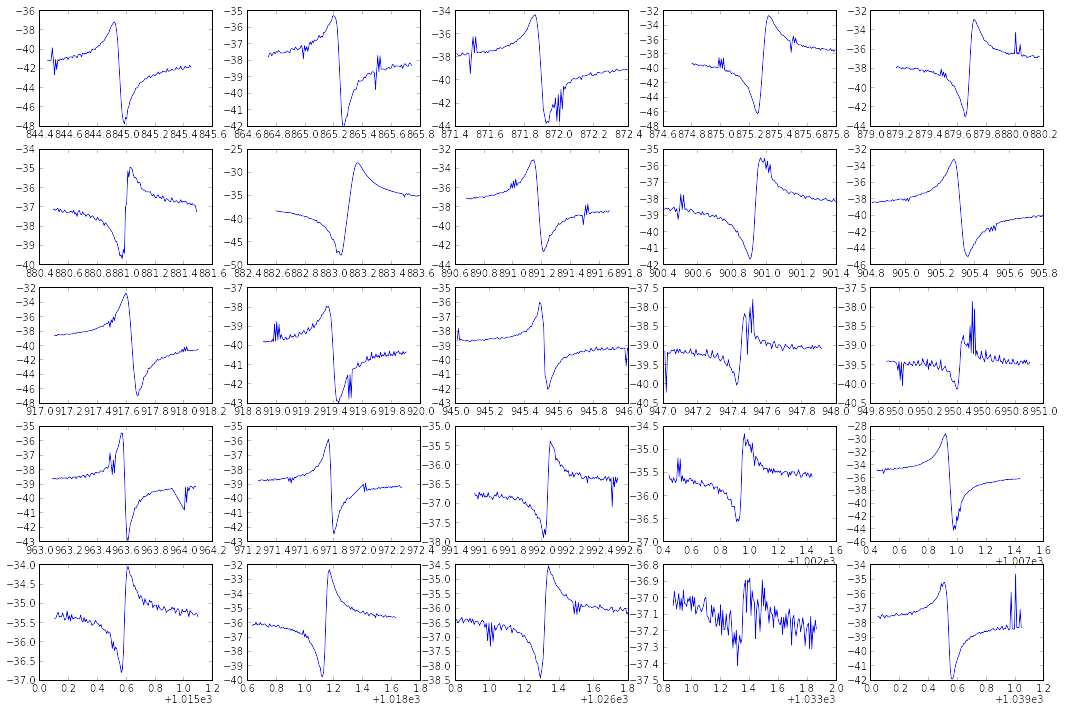

In [295]:
fig,axs = subplots(5,5,figsize=(18,12))
for k in range(25):
    ax = axs.flatten()[k]
    f0 = resonances[k]
    idx = abs(swp.freqs - f0) < .5
    res = kid_readout.analysis.resonator.fit_best_resonator(swp.freqs[idx],d2[idx],errors=swp.errors[idx],delay_estimate=0)
    ax.plot(swp.freqs[idx],20*np.log10(abs(d2[idx])))
    print res.f_0,res.Q_i,res.Q_e_real,res.Q_e_imag,res.Q
#    ax.plot(res.freq_data,20*np.log10(abs(res.model(x=res.freq_data))))

In [73]:
f2 = kid_readout.utils.sweeps.prepare_sweep(ri,np.array(resonances[:16]),offsets=np.arange(-32,32)/128.,nsamp=2**17)

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0



In [220]:
ri.set_dac_atten(0)

In [301]:
swp2 = kid_readout.utils.sweeps.do_prepared_sweep(ri,loopback=False,nchan_per_step=16,reads_per_step=8)

detected mcnt overflow None 1278008 0 32768 0 160 1278008
detected mcnt overflow None 1998906 0 32768 0 752 1998906
detected mcnt overflow None 688187 0 32768 0 1312 688187
detected mcnt overflow None 1671229 0 32768 0 1904 1671229


(844, 846)

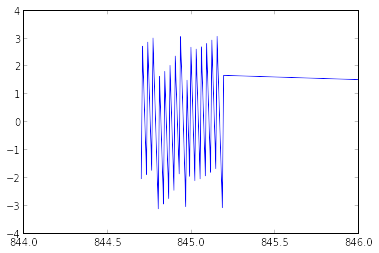

In [78]:
plot(swp2.freqs,np.angle(swp2.data))
xlim(844,846)

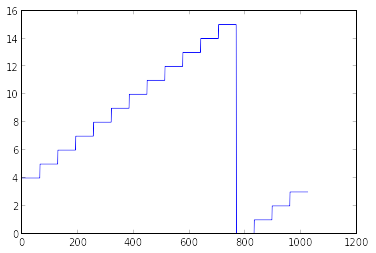

In [79]:
plot(swp2.sweep_indexes)

In [302]:
fr,d,err = swp2.select_index(6)

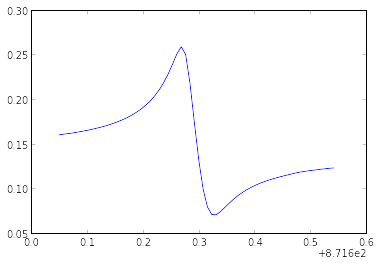

In [303]:
plot(fr,abs(d))

In [304]:
res = kid_readout.analysis.resonator.fit_best_resonator(fr,np.conj(d),errors=err,delay_estimate=-31.5)

In [305]:
res.Q_e_imag

-14002.979142873199

In [306]:
res.Q

17541.451891153192

In [307]:
res.Q_i

20598.982957555159

In [308]:
res.Q_e_real

1683.179416025471

In [316]:
Qe = res.Q_e_real+1j*res.Q_e_imag

In [320]:
1/(1/res.Q-np.abs(1/Qe))

-71967.45145292519

In [309]:
res.f_0

871.89711432840181

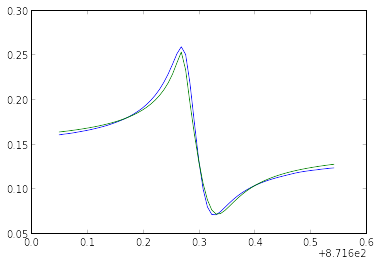

In [310]:
plot(fr,abs(d))
plot(res.freq_data,abs(res.model()))

In [245]:
swp2.blocks[0].sweep_index

4

In [312]:
blk1 = [blk for blk in swp2.blocks if blk.sweep_index==6]

In [313]:
len(blk1)

64

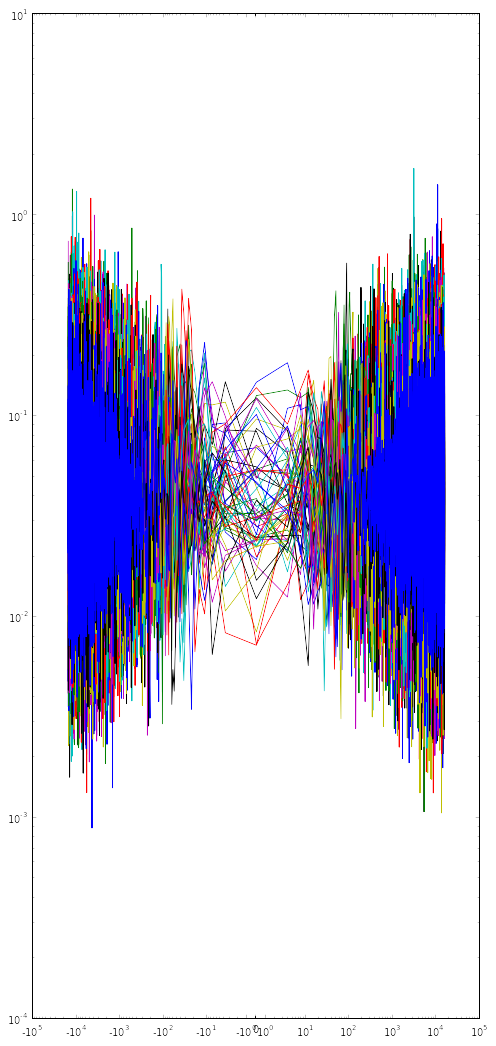

In [315]:
figure(figsize=(8,18))
for n,blk in enumerate(blk1):
    pxx,fr = mlab.psd(blk.data-blk.data.mean(),Fs=512e6/2**14,NFFT=1024*8)
    semilogy(fr,pxx)#*(n+1))
xscale('symlog')

In [271]:
blk = blk1[31]

In [281]:
pxx,fr = mlab.psd(blk.data-blk.data.mean(),Fs=512e6/2**14,NFFT=8192)

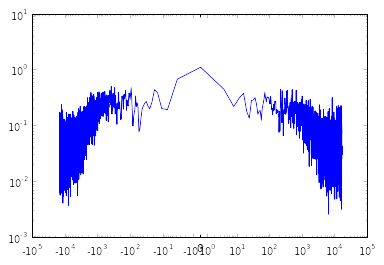

In [282]:
semilogy(fr,pxx)
xscale('symlog')

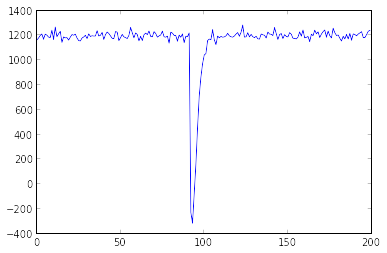

In [290]:
plot(blk.data.real[19600:19800])

In [248]:
res.a

AttributeError: 'Resonator' object has no attribute 'a'

In [ ]:
blk.data.shape

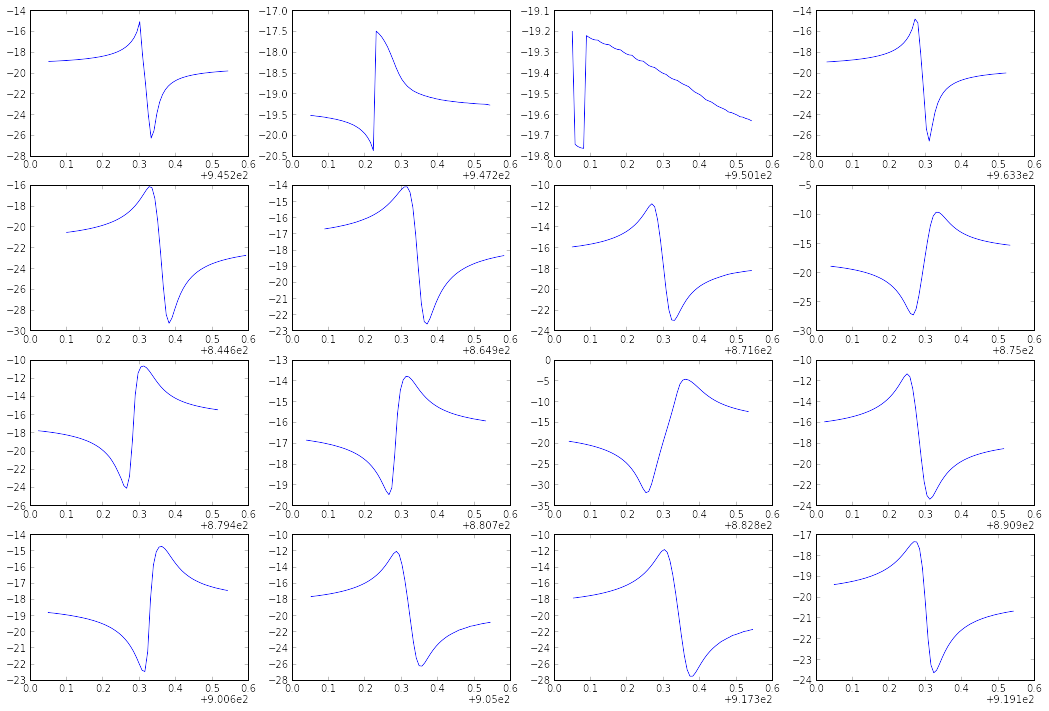

In [311]:
fig,axs = subplots(4,4,figsize=(18,12))
for k in range(16):
    ax = axs.flatten()[k]
    fr,s21,err = swp2.select_index(k)
    ax.plot(fr,20*np.log10(abs(s21)))
    #res = kid_readout.analysis.resonator.fit_best_resonator(fr,s21,errors=err,delay_estimate=31.5)
    #ax.plot(fr,20*np.log10(abs(res.model(x=fr))))


In [294]:
ri.dac_atten

0.0